In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Display plots inline
%matplotlib inline

In [4]:
data = pd.read_csv("Retail_Data.csv")
data = data.dropna()
data.head()

,Retailer,Zone,Retailer_Age,Perindex,Growth,NPS_Category
0,1,North,<=2,81.84,3.04,Promoter
1,2,East,2 to 5,53.22,4.22,Detractor
2,3,West,>5,85.33,6.73,Promoter
3,4,West,>5,82.00,1.56,Promoter
4,5,South,2 to 5,64.35,2.71,Detractor


In [5]:
data.describe(include='all')

,Retailer,Zone,Retailer_Age,Perindex,Growth,NPS_Category
count,99.000000,99,99,99.000000,99.000000,99
unique,NaN,4,3,NaN,NaN,3
top,NaN,South,>5,NaN,NaN,Passive
freq,NaN,31,55,NaN,NaN,41
mean,50.919192,NaN,NaN,70.496970,5.140505,NaN
std,28.853139,NaN,NaN,9.569232,2.630961,NaN
min,1.000000,NaN,NaN,46.530000,1.470000,NaN
25%,26.500000,NaN,NaN,65.080000,3.055000,NaN
50%,51.000000,NaN,NaN,71.150000,4.450000,NaN
75%,75.500000,NaN,NaN,77.175000,6.270000,NaN


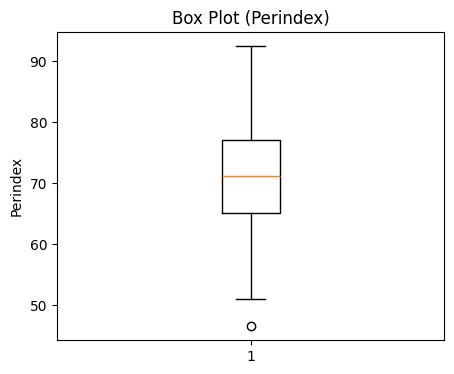

In [6]:
plt.figure(figsize=(5, 4))
plt.boxplot(data['Perindex'])
plt.title('Box Plot (Perindex)')
plt.ylabel('Perindex')
plt.show()

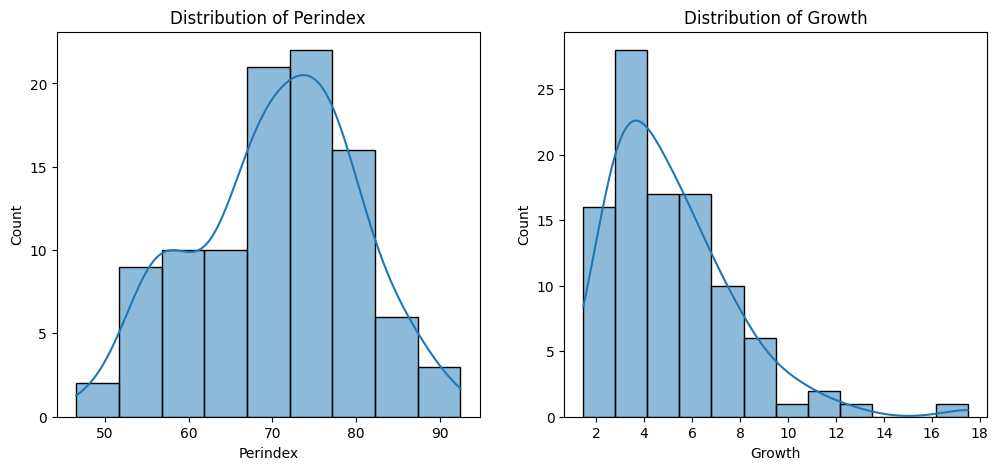

In [7]:
# Histograms to understand data distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data['Perindex'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Perindex')

sns.histplot(data['Growth'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Growth')

plt.show()

In [8]:
mean_perindex = data['Perindex'].mean()
median_perindex = data['Perindex'].median()

mean_growth = data['Growth'].mean()
median_growth = data['Growth'].median()

print(f"Mean of Perindex: {mean_perindex:.3f}")
print(f"Median of Perindex: {median_perindex:.3f}")

print(f"Mean of Growth: {mean_growth:.3f}")
print(f"Median of Growth: {median_growth:.3f}")

Mean of Perindex: 70.497
Median of Perindex: 71.150
Mean of Growth: 5.141
Median of Growth: 4.450


In [9]:
trimmed_mean_growth = stats.trim_mean(data['Growth'], 0.05)
print(f"Trimmed mean Growth: {trimmed_mean_growth}")

Trimmed mean Growth: 4.943516483516483


In [10]:
mode_nps = data['NPS_Category'].mode()[0]
mode_nps

'Passive'

In [11]:
variance_growth = data['Growth'].var()
std_growth = data['Growth'].std()
cv_growth = std_growth / data['Growth'].mean()

print(f"Variance of Growth: {variance_growth:.3f}")
print(f"Standard Deviation of Growth: {std_growth:3f}")
print(f"Coefficient of Variation (CV) of Growth: {cv_growth:.3f}")

Variance of Growth: 6.922
Standard Deviation of Growth: 2.630961
Coefficient of Variation (CV) of Growth: 0.512


In [12]:
skew_growth = stats.skew(data['Growth'])

print(f"Skewness of Growth: {skew_growth:.2f}")

Skewness of Growth: 1.58


In [13]:
# Group by Zone
grouped = data.groupby('Zone')['Perindex'].agg(
    n='count',
    mean='mean',
    sd='std'
)
grouped['cv'] = grouped['sd'] / grouped['mean']

grouped

,n,mean,sd,cv
Zone,,,,
East,15,63.247333,9.447250,0.149370
North,25,68.818800,10.261363,0.149107
South,31,73.091613,9.121644,0.124797
West,28,73.006429,7.346850,0.100633


In [14]:
np.corrcoef(data.Perindex,data.Growth)

array([[1.        , 0.08977665],
       [0.08977665, 1.        ]])

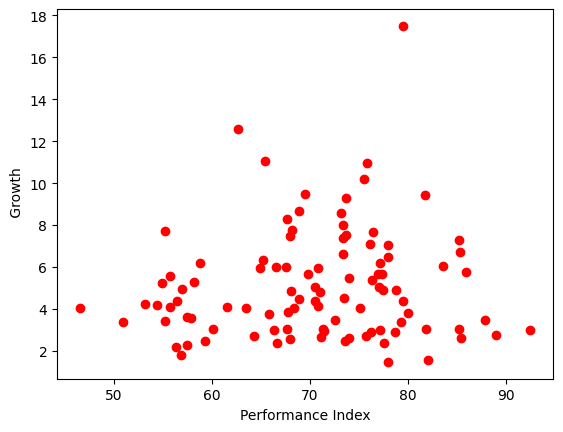

In [15]:
plt.scatter(data.Perindex, data.Growth,color='red')
plt.xlabel('Performance Index'); plt.ylabel(' Growth')
plt.show()